In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Text(0, 0.5, 'Cumalative Density')

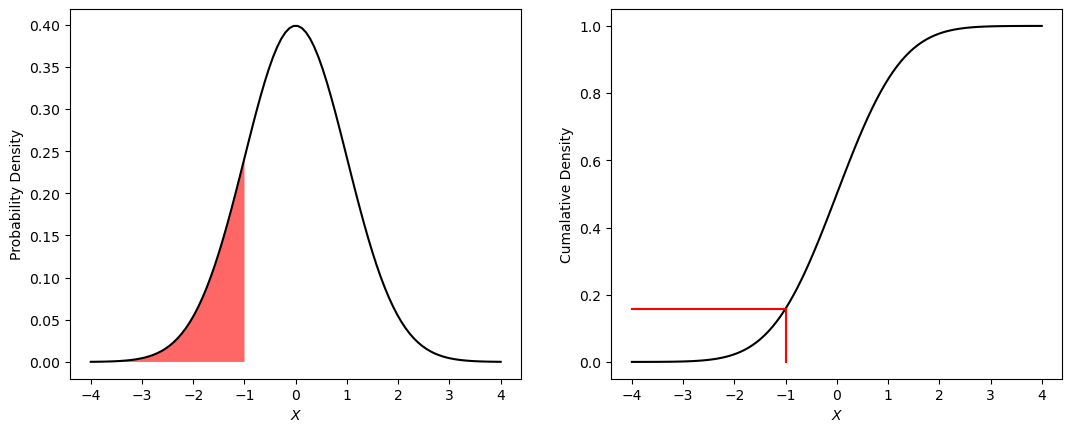

In [3]:
import numpy as np
from scipy.stats import norm

xlim = (-4,4)
x = np.linspace(*xlim, 100)
fig, ax = plt.subplots(1,2, figsize=(12.8,4.8))
ax[0].plot(x, norm.pdf(x), c='k')

xp = -1
xs = np.linspace(xlim[0],xp, 100)
ax[0].fill_between(xs, 0, norm.pdf(xs), fc='r', alpha=0.6)

ax[1].plot(x, norm.cdf(x), c='k')
ax[1].plot( [xp,xp], [0, norm.cdf(xp) ], c='r' )
ax[1].plot( [xlim[0], xp], [norm.cdf(xp), norm.cdf(xp)], c='r' )

ax[0].set_xlabel('$X$')
ax[1].set_xlabel('$X$')
ax[0].set_ylabel('Probability Density')
ax[1].set_ylabel('Cumalative Density')


In [4]:
import numpy as np
from scipy.stats import multivariate_normal as mvn, norm

dist = mvn( mean=[0,0], cov=[[4,1],[1,2]] )


xlim = (-6,6)
ylim = (-4,4)
  
x = np.linspace(*xlim,100)
y = np.linspace(*ylim,100)

X, Y = np.meshgrid(x,y)
pos = np.dstack( (X,Y) )
Z = dist.pdf(pos)




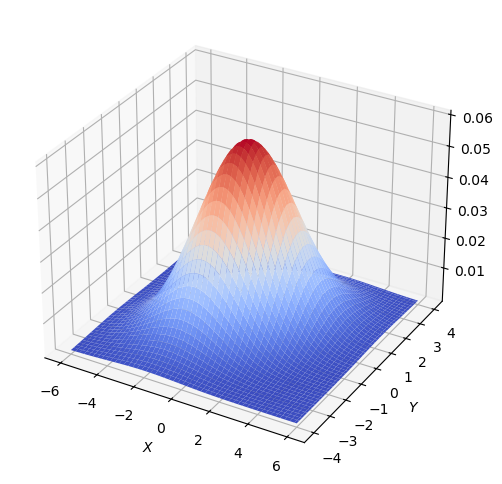

In [5]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
_ = ax.plot_surface(X, Y, dist.pdf(pos), cmap='coolwarm' )


(0.0, 0.29606752515897305, -4.0, 4.0)

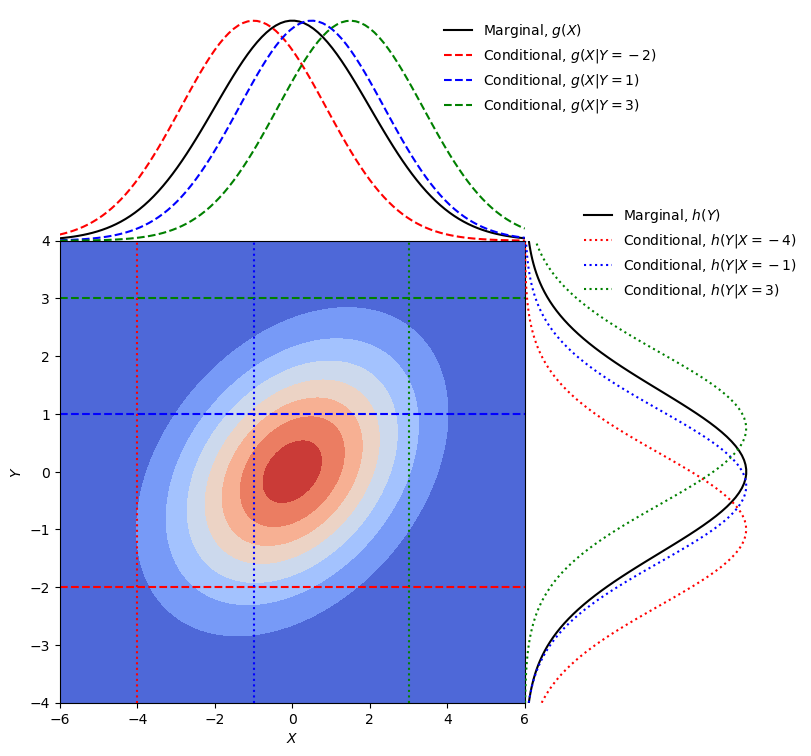

In [6]:
fig, ax = plt.subplots(2,2, figsize=(9, 9), height_ratios=[1,2], width_ratios=[2,1], gridspec_kw={'hspace':0, 'wspace':0} )

# draw joint density
ax[1,0].contourf( X, Y, Z, cmap='coolwarm')

# draw marginals
ax[0,0].plot( x, norm.pdf(x, 0, 2 ), c='k', label='Marginal, $g(X)$' )
ax[1,1].plot( norm.pdf(y, 0, 2**0.5), y, c='k', label='Marginal, $h(Y)$' )

# draw some conditionals
for yc, col in zip([-2,1,3], ['r','b','g']):
    ys = np.full_like(x, yc)
    yv = dist.pdf( np.dstack((x,ys)) )
    yv *= max(norm.pdf(x,0,2))/max(yv)
    ax[0,0].plot( x, yv, c=col, ls='--', label=f'Conditional, $g(X|Y={yc})$' )
    ax[1,0].axhline(yc, c=col, ls='--')

for xc, col in zip( [-4,-1,3], ['r','b','g']):
    xs = np.full_like(y, xc)
    xv = dist.pdf( np.dstack((xs,y)) )
    xv *= max(norm.pdf(y,0,2**0.5))/max(xv)
    ax[1,1].plot( xv, y, c=col, ls=':', label=f'Conditional, $h(Y|X={xc})$' )
    ax[1,0].axvline(xc, c=col, ls=':')


# just styling
ax[1,0].set_xlabel('$X$')
ax[1,0].set_ylabel('$Y$')
ax[0,0].legend(frameon=False, loc='upper left', bbox_to_anchor=(0.8,1))
ax[1,1].legend(frameon=False, loc='upper left', bbox_to_anchor=(0.2,1.1))
ax[0,0].set_xlim( ax[1,0].get_xlim() )
ax[0,0].set_ylim( bottom=0 )
ax[1,1].set_ylim( ax[1,0].get_ylim() )
ax[1,1].set_xlim( left=0 )
ax[0,1].set_visible(False)
ax[0,0].axis('off')
ax[1,1].axis('off')



In [7]:
import numpy as np
np.random.seed(11111) # set a reproducible seed 
data = np.random.normal(3,1, size=200) 

Text(0, 0.5, '$N$')

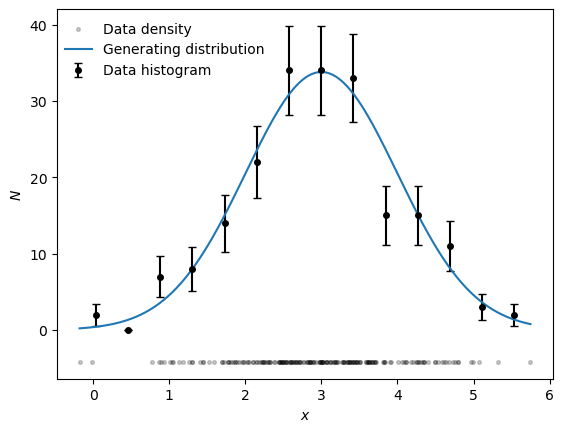

In [8]:
from scipy.stats import norm
    
# make the plot figure and axis
fig = plt.figure('Data Visualisation')
ax = fig.add_subplot()
       
# histogram the data (note I make use of the Freedman-Draconis rule
# to determine the binning)
nh, xe = np.histogram(data, bins="fd")
    
# get the histogram bin centres
cx = 0.5*(xe[:-1]+xe[1:])
    
# draw the histogram entries as points with error bars
# each histogram bin is a count of events so the error
# in each bin is Poisson in nature and given by the square
# root of the number
ax.errorbar(cx, nh, yerr=nh**0.5, fmt='ko', markersize=4, capsize=3, label='Data histogram')
    
# make a little scatter plot to show where the data fall
scat_y = np.full_like(data, -ax.get_ylim()[1]*0.1)
ax.scatter(data,scat_y, s=7, alpha=0.2, color='k', label='Data density')
    
# overlay the true distribution we generated from
    
# create a linear space along the x axis
x = np.linspace(xe[0],xe[-1],400)
    
# compute the true probability of each value
# given we know the true Gaussian distribution
# we generated from
y = norm(3,1).pdf(x)
    
# calculate the proper normalisation given the bin width
# and number of events
N = len(data)*(xe[1]-xe[0])
    
# plot it
ax.plot(x,N*y, label='Generating distribution')
    
# make a legend
ax.legend(frameon=False, loc="upper left", bbox_to_anchor=[-0.01,1])
    
# set some axis labels
ax.set_xlabel('$x$')
ax.set_ylabel('$N$')


In [9]:
def our_likelihood(mu, sigma):
    N = 1 / ( sigma * np.sqrt( 2 * np.pi ) )
    pdf = N * np.exp( -(data-mu)**2 / (2*sigma**2) )
    return np.prod(pdf)

(0.8, 1.2)

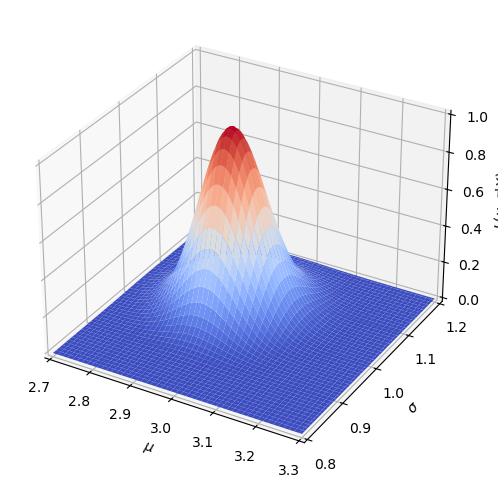

In [10]:
from matplotlib import cm

# parameter ranges
mu_range = (2.7,3.3)
sg_range = (0.8,1.2)

    
# make the plot figure and axis
fig = plt.figure('Our Likelihood', figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')  

# make linear spaces
x = np.linspace(*mu_range,100)
y = np.linspace(*sg_range,100)
    
# mesh these into a grid
X, Y = np.meshgrid(x,y)
    
# the `our_likelihood()` method is not vectorised
# in other words it expects its arguments (mu, sigma)
# to be scalars (just numbers). passing vectors will
# confuse it because it doesn't know how to perform
# `data-mu` or what dimension to perform the prod on
# we can make a vectorised version (note, this is a 
# wrapper that will not increase performance)
vec_our_likelihood = np.vectorize( our_likelihood )
    
# draw the surface
Z = vec_our_likelihood(X,Y)
# scale it to have a max of one so the plot axis isn't silly
Z /= np.max(Z)
    
ax.plot_surface(X,Y,Z, cmap=cm.coolwarm )
    
# set some axis labels
ax.set_xlabel('$\mu$')
ax.set_ylabel('$\sigma$')
ax.set_zlabel('$L(\mu,\sigma|X)$')
    
# tidy axes
ax.set_xticks(np.linspace(*mu_range,7))
ax.set_yticks(np.linspace(*sg_range,5))
ax.set_xlim(mu_range)
ax.set_ylim(sg_range)


In [11]:
# define the uniform and normal distributions
# (note we could get these from scip.stats or numba_stats)

def uniform(x,a,b):
    return np.full_like(x,1/(b-a))

def normal(x,mu,sg):
    return 1/(sg*np.sqrt(2*np.pi)) * np.exp( -((x-mu)**2)/(2*sg**2) )

# make a list of our prior means and widths
# the first one is just the range of the uniform prior
prior_opts = [ (2.7,3.3), 
               (3.3,0.4),
               (2.8,0.15),
               (3.1,0.03),
             ]

# make the list of prior functions
priors = [ lambda x: uniform(x,*prior_opts[0]),
           lambda x: normal(x,*prior_opts[1]),
           lambda x: normal(x,*prior_opts[2]),
           lambda x: normal(x,*prior_opts[3])
         ]

# make the 1d likelihood function
lmu = np.mean(data)
lsg = 1/np.sqrt(len(data))
likelihood = lambda x: normal(x, lmu, lsg)

# compute the posterior distribution
# these will also be normally distributed 
# becuase the product of a normal and uniform
# is normal and the product of two normals is also
# normal
posterior_opts = [ (lmu, lsg) ]

for propt in prior_opts[1:]:
    pmu = propt[0]
    psg = propt[1]
    
    nmu = (lmu*psg**2 + pmu*lsg**2) / (psg**2 + lsg**2)
    nsg = np.sqrt( (psg**2 *lsg**2) / (psg**2 + lsg**2) )
    
    posterior_opts.append( (nmu, nsg) )

# make the posterior list
posteriors = [ lambda x: normal(x, lmu, lsg), 
               lambda x: normal(x, *posterior_opts[1]),
               lambda x: normal(x, *posterior_opts[2]),
               lambda x: normal(x, *posterior_opts[3]),
             ]

# list the prior names
labels = [ 'uniform', 'wide', 'narrow', 'very narrow' ]


Text(0.5, 1.0, 'Posterior')

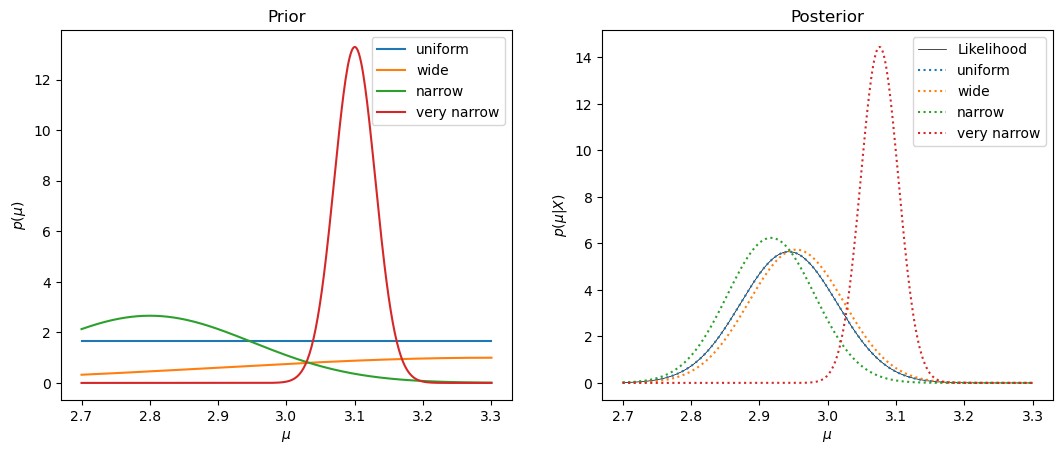

In [12]:
fig, ax = plt.subplots(1,2,figsize=(12.8,4.8))
x = np.linspace(2.7,3.3,400)

# priors
for prior, label in zip(priors, labels):
    ax[0].plot( x, prior(x), label=label )
    
ax[0].legend()
ax[0].set_xlabel('$\mu$')
ax[0].set_ylabel('$p(\mu)$')
ax[0].set_title('Prior')

# likelihood
ax[1].plot(x, likelihood(x), c='k', label='Likelihood', lw=0.5)

# posteriors
for posterior, label in zip(posteriors, labels):
    ax[1].plot( x, posterior(x), label=label, ls=':' )
    
ax[1].legend()
ax[1].set_xlabel('$\mu$')
ax[1].set_ylabel('$p(\mu|X)$')
ax[1].set_title('Posterior')


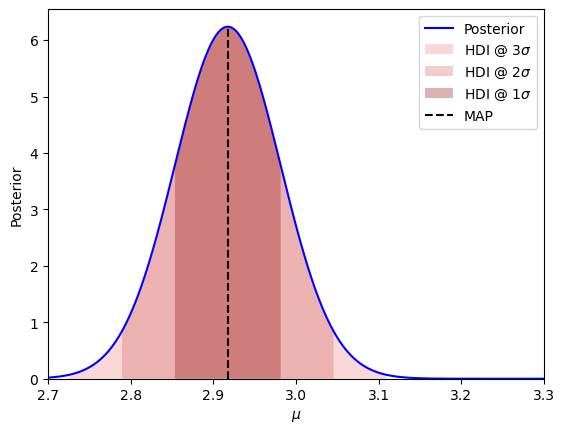

In [13]:
fig, ax = plt.subplots()
ax.plot( x, posteriors[2](x), c='b', label='Posterior' )
mu, sg = posterior_opts[2]

for sigma, col in zip([3,2,1], ['lightcoral','indianred','darkred'] ):
    xs = np.linspace( mu-sigma*sg, mu+sigma*sg, 200 )
    ax.fill_between( xs, posteriors[2](xs), fc=col, alpha=0.3, label=f'HDI @ ${sigma}\sigma$' )

ax.plot( [mu,mu], [0,posteriors[2](mu)], c='k', ls='--', label='MAP')

ax.set_xlabel('$\mu$')
ax.set_ylabel('Posterior')
ax.set_ylim(bottom=0)
ax.autoscale(enable=True, axis='x', tight=True)
ax.legend()